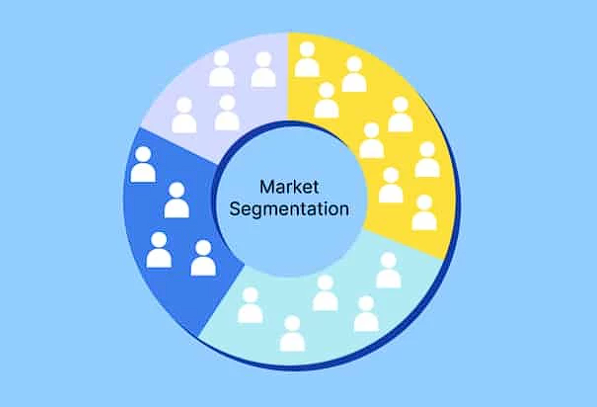

# Market Segmentation for an Electric Vehicle Startup.

**Abinash Bora |** abinashbora01@gmail.com

**IIT Bombay**

**Batch: SB-24-6-3**

**Reference: Leisch, F., Dolnicar, S., & Grün, B. (2018). Market segmentation analysis: Understanding it, doing it, and making it useful.**

This project involves breaking down the Indian Electric Vehicle (EV) market into distinct segments to develop a strategic plan for entering the market. The aim is to identify the best locations to establish operations, determine which customer groups to target, and set appropriate pricing strategies. This process will use available datasets to guide decision-making and ensure a targeted approach for the startup's market entry.

**Data scraped for this project from:**
1. https://pib.gov.in/Pressreleaseshare.aspx?PRID=1808115 (Vahan Pariavahan, Government of India Vehicle Registration)
2. https://www.smev.in/statistics (Society of Manufacturers of Electric Vehicles)


Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Fuel Type wise vehicle registration dataset

In [2]:
# Read the CSV file into a DataFrame
data_fuel_type = pd.read_csv("Vehicles_registration.csv")

# Display the first few rows of the DataFrame
data_fuel_type.head()

,Month,CNG ONLY,DIESEL,DIESEL/HYBRID,DUAL DIESEL/CNG,ELECTRIC(BOV),ETHANOL,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,SOLAR,FUEL CELL HYDROGEN,LNG,METHANOL,DUAL DIESEL/LNG
0,Jan-14,2103,270915,3,0,232,0,188,10278,1347016,20623,0,0,6307,9,0,0,0,0
1,Feb-14,1607,219601,3,1,171,1,116,8884,1176669,15266,0,1,4803,17,0,0,0,0
2,Mar-14,2026,258723,3,1,220,1,106,11115,1329273,18800,0,0,5609,16,0,0,0,0
3,Apr-14,1718,222632,3,1,252,0,121,8522,1296500,19714,1,0,5600,19,0,0,0,0
4,May-14,1727,237336,6,0,186,2,103,9656,1408836,20626,0,1,6317,14,0,0,0,0


# Exploring the dataset

In [3]:
data_fuel_type.shape

(115, 19)

In [4]:
data_fuel_type.columns.to_list()

['Month',
 'CNG ONLY',
 'DIESEL',
 'DIESEL/HYBRID',
 'DUAL DIESEL/CNG',
 'ELECTRIC(BOV)',
 'ETHANOL',
 'LPG ONLY',
 'NOT APPLICABLE',
 'PETROL',
 'PETROL/CNG',
 'PETROL/ETHANOL',
 'PETROL/HYBRID',
 'PETROL/LPG',
 'SOLAR',
 'FUEL CELL HYDROGEN',
 'LNG',
 'METHANOL',
 'DUAL DIESEL/LNG']

In [5]:
data_fuel_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month               115 non-null    object
 1   CNG ONLY            115 non-null    int64 
 2   DIESEL              115 non-null    int64 
 3   DIESEL/HYBRID       115 non-null    int64 
 4   DUAL DIESEL/CNG     115 non-null    int64 
 5   ELECTRIC(BOV)       115 non-null    int64 
 6   ETHANOL             115 non-null    int64 
 7   LPG ONLY            115 non-null    int64 
 8   NOT APPLICABLE      115 non-null    int64 
 9   PETROL              115 non-null    int64 
 10  PETROL/CNG          115 non-null    int64 
 11  PETROL/ETHANOL      115 non-null    int64 
 12  PETROL/HYBRID       115 non-null    int64 
 13  PETROL/LPG          115 non-null    int64 
 14  SOLAR               115 non-null    int64 
 15  FUEL CELL HYDROGEN  115 non-null    int64 
 16  LNG                 115 no

In [6]:
data_fuel_type["Month"] = pd.to_datetime(data_fuel_type["Month"], format="%b-%y")
data_fuel_type.head()

,Month,CNG ONLY,DIESEL,DIESEL/HYBRID,DUAL DIESEL/CNG,ELECTRIC(BOV),ETHANOL,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,SOLAR,FUEL CELL HYDROGEN,LNG,METHANOL,DUAL DIESEL/LNG
0,2014-01-01,2103,270915,3,0,232,0,188,10278,1347016,20623,0,0,6307,9,0,0,0,0
1,2014-02-01,1607,219601,3,1,171,1,116,8884,1176669,15266,0,1,4803,17,0,0,0,0
2,2014-03-01,2026,258723,3,1,220,1,106,11115,1329273,18800,0,0,5609,16,0,0,0,0
3,2014-04-01,1718,222632,3,1,252,0,121,8522,1296500,19714,1,0,5600,19,0,0,0,0
4,2014-05-01,1727,237336,6,0,186,2,103,9656,1408836,20626,0,1,6317,14,0,0,0,0


In [7]:
#Adding a new column "HYBRID COMBINED" to dataset, which is the sum of "PETROL/HYBRID" and "DIESEL/HYBRID".

data_fuel_type["HYBRID COMBINED"] = data_fuel_type["PETROL/HYBRID"] + data_fuel_type["DIESEL/HYBRID"]
data_fuel_type.head()

,Month,CNG ONLY,DIESEL,DIESEL/HYBRID,DUAL DIESEL/CNG,ELECTRIC(BOV),ETHANOL,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,SOLAR,FUEL CELL HYDROGEN,LNG,METHANOL,DUAL DIESEL/LNG,HYBRID COMBINED
0,2014-01-01,2103,270915,3,0,232,0,188,10278,1347016,20623,0,0,6307,9,0,0,0,0,3
1,2014-02-01,1607,219601,3,1,171,1,116,8884,1176669,15266,0,1,4803,17,0,0,0,0,4
2,2014-03-01,2026,258723,3,1,220,1,106,11115,1329273,18800,0,0,5609,16,0,0,0,0,3
3,2014-04-01,1718,222632,3,1,252,0,121,8522,1296500,19714,1,0,5600,19,0,0,0,0,3
4,2014-05-01,1727,237336,6,0,186,2,103,9656,1408836,20626,0,1,6317,14,0,0,0,0,7


In [8]:
#Removing the "PETROL/HYBRID" and "DIESEL/HYBRID" columns from the dataset

data_fuel_type.drop(["PETROL/HYBRID", "DIESEL/HYBRID"], axis=1, inplace=True)
data_fuel_type.head()

,Month,CNG ONLY,DIESEL,DUAL DIESEL/CNG,ELECTRIC(BOV),ETHANOL,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/LPG,SOLAR,FUEL CELL HYDROGEN,LNG,METHANOL,DUAL DIESEL/LNG,HYBRID COMBINED
0,2014-01-01,2103,270915,0,232,0,188,10278,1347016,20623,0,6307,9,0,0,0,0,3
1,2014-02-01,1607,219601,1,171,1,116,8884,1176669,15266,0,4803,17,0,0,0,0,4
2,2014-03-01,2026,258723,1,220,1,106,11115,1329273,18800,0,5609,16,0,0,0,0,3
3,2014-04-01,1718,222632,1,252,0,121,8522,1296500,19714,1,5600,19,0,0,0,0,3
4,2014-05-01,1727,237336,0,186,2,103,9656,1408836,20626,0,6317,14,0,0,0,0,7


# Visualizing the dataset

Text(0, 0.5, 'Count')

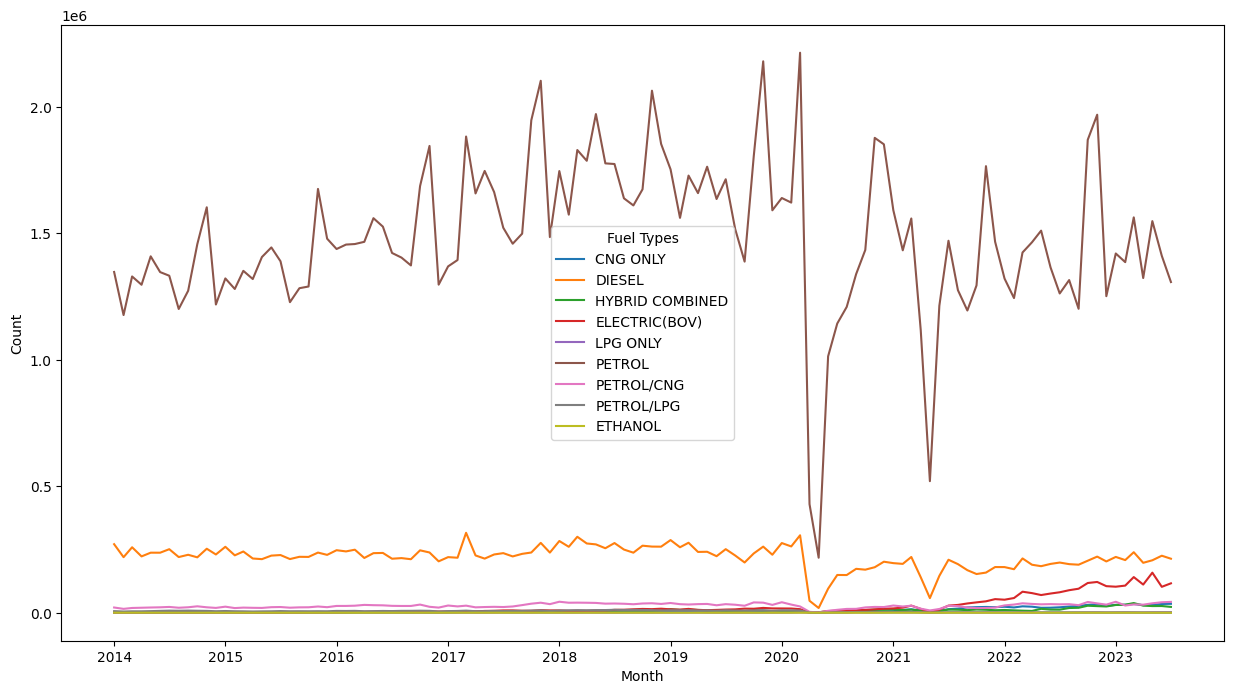

In [9]:
plt.figure(figsize=(15,8))

fuel_types = ["CNG ONLY", "DIESEL", "HYBRID COMBINED", "ELECTRIC(BOV)", "LPG ONLY",
              "PETROL", "PETROL/CNG", "PETROL/LPG", "ETHANOL"]

for fuel_type in fuel_types:
    plt.plot(data_fuel_type["Month"], data_fuel_type[fuel_type], label=fuel_type)

plt.legend(title="Fuel Types", loc="best")
plt.xlabel("Month")
plt.ylabel("Count")

**From the graph, we observe:**

Petrol vehicles have the highest and most consistent registrations, showing their market dominance.

Diesel vehicle registrations are stable, reflecting steady demand.

Electric vehicle registrations are rising, particularly from late 2021, highlighting growing interest in electric mobility.
This increase in EV registrations suggests a shift towards cleaner and more sustainable transportation options.

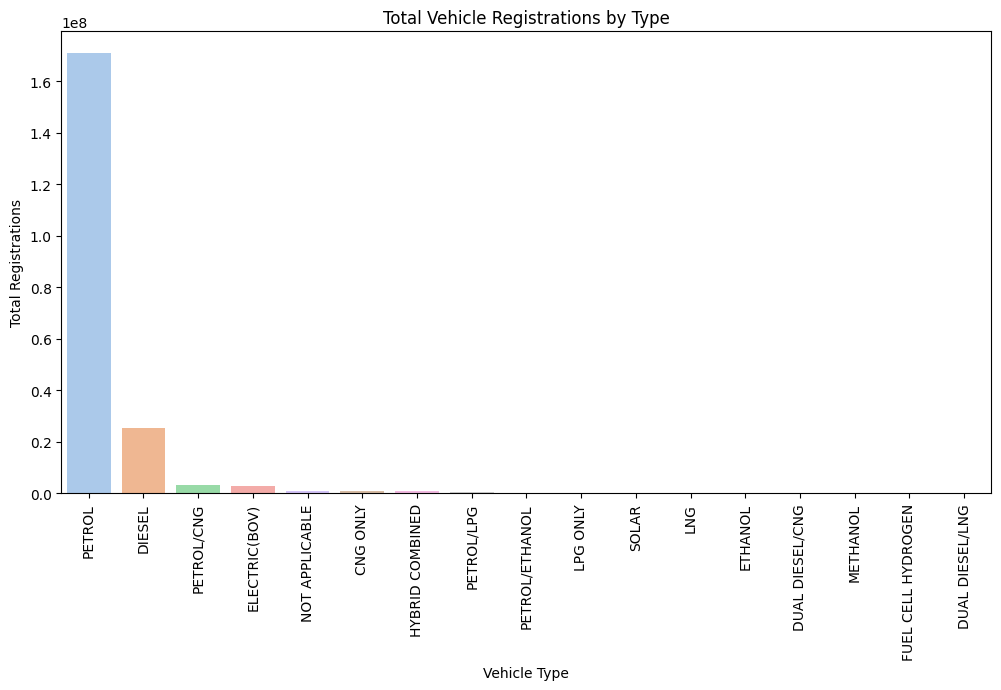

In [10]:
total_registration = data_fuel_type.drop('Month', axis=1).sum()

# Sorting the columns based on total registration in descending order
sorted_columns = total_registration.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_columns.index, y=sorted_columns.values, palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Registrations')
plt.title('Total Vehicle Registrations by Type')
plt.show()

**From the above visualization, we observe:**

The Indian vehicle market remains predominantly dependent on traditional petrol and diesel fuels.

Electric vehicles are experiencing notable growth; however, widespread adoption will need to address challenges such as infrastructure development and cost.

Visualize distribution of numerical columns

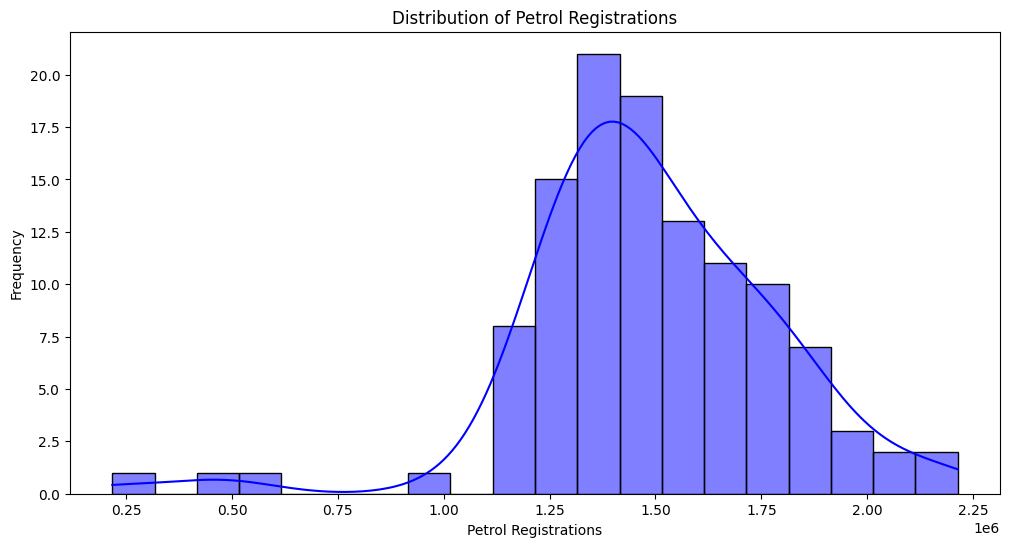

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data_fuel_type["PETROL"], bins=20, kde=True, color="blue")
plt.title("Distribution of Petrol Registrations")
plt.xlabel("Petrol Registrations")
plt.ylabel("Frequency")
plt.show()

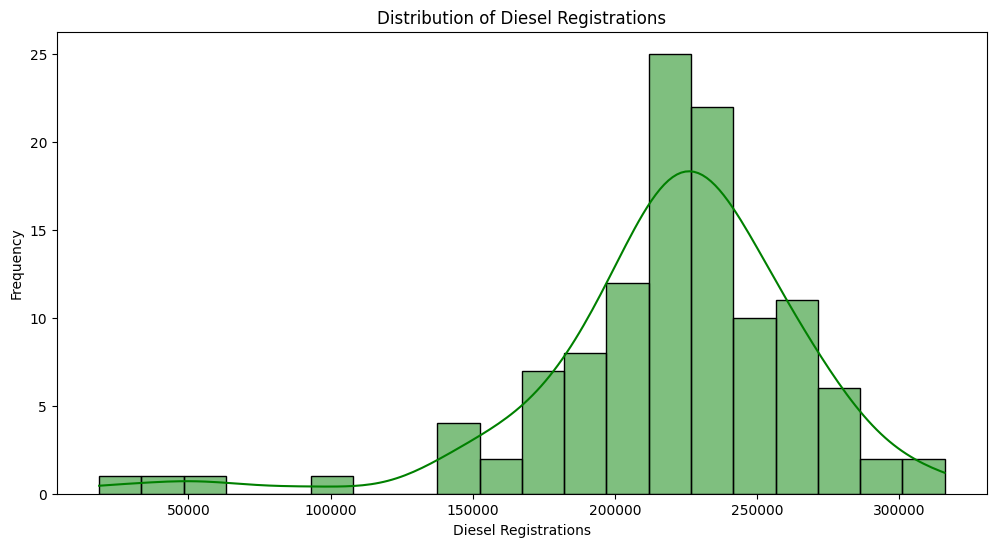

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(data_fuel_type["DIESEL"], bins=20, kde=True, color="green")
plt.title("Distribution of Diesel Registrations")
plt.xlabel("Diesel Registrations")
plt.ylabel("Frequency")
plt.show()

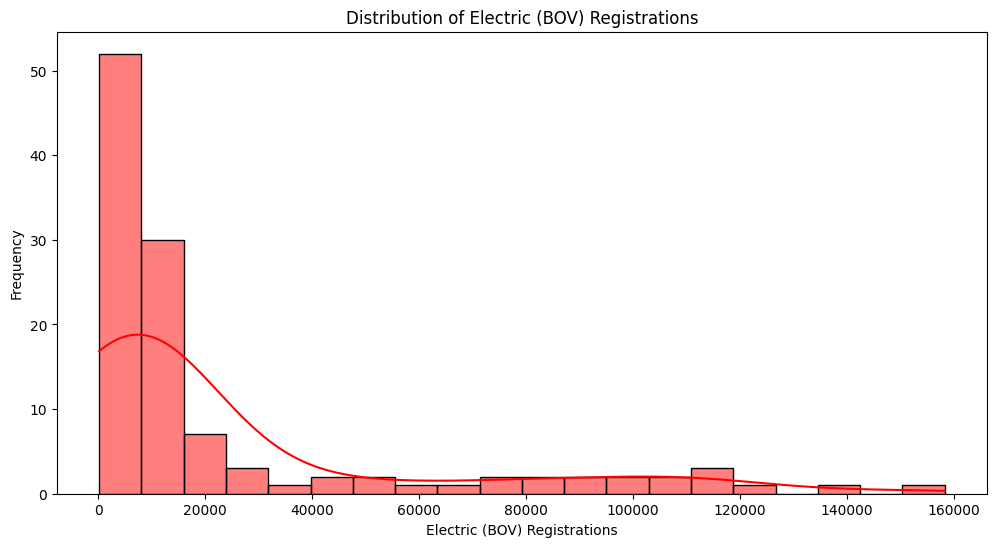

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data_fuel_type["ELECTRIC(BOV)"], bins=20, kde=True, color="r")
plt.title("Distribution of Electric (BOV) Registrations")
plt.xlabel("Electric (BOV) Registrations")
plt.ylabel("Frequency")
plt.show()

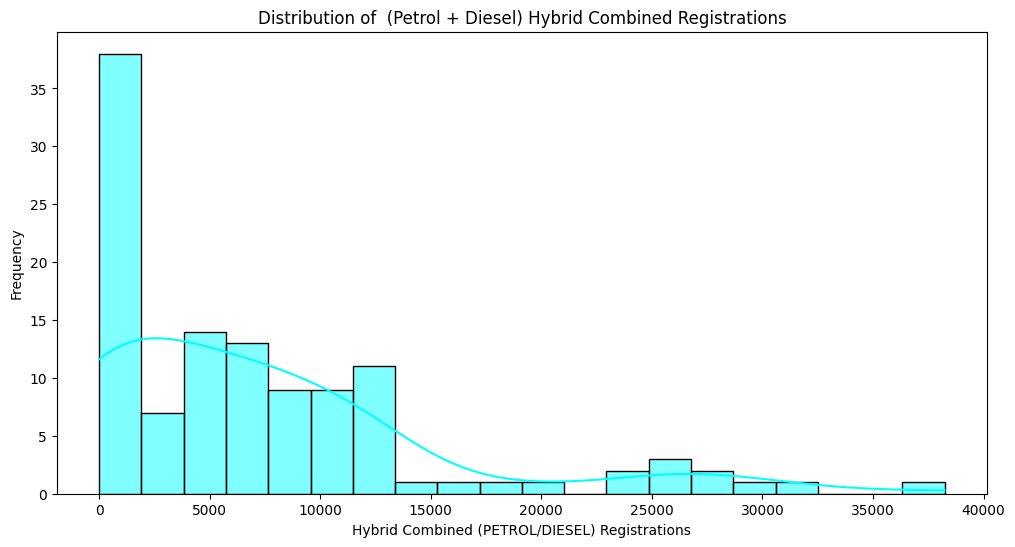

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data_fuel_type["HYBRID COMBINED"], bins=20, kde=True, color="cyan")
plt.title("Distribution of  (Petrol + Diesel) Hybrid Combined Registrations")
plt.xlabel("Hybrid Combined (PETROL/DIESEL) Registrations")
plt.ylabel("Frequency")
plt.show()

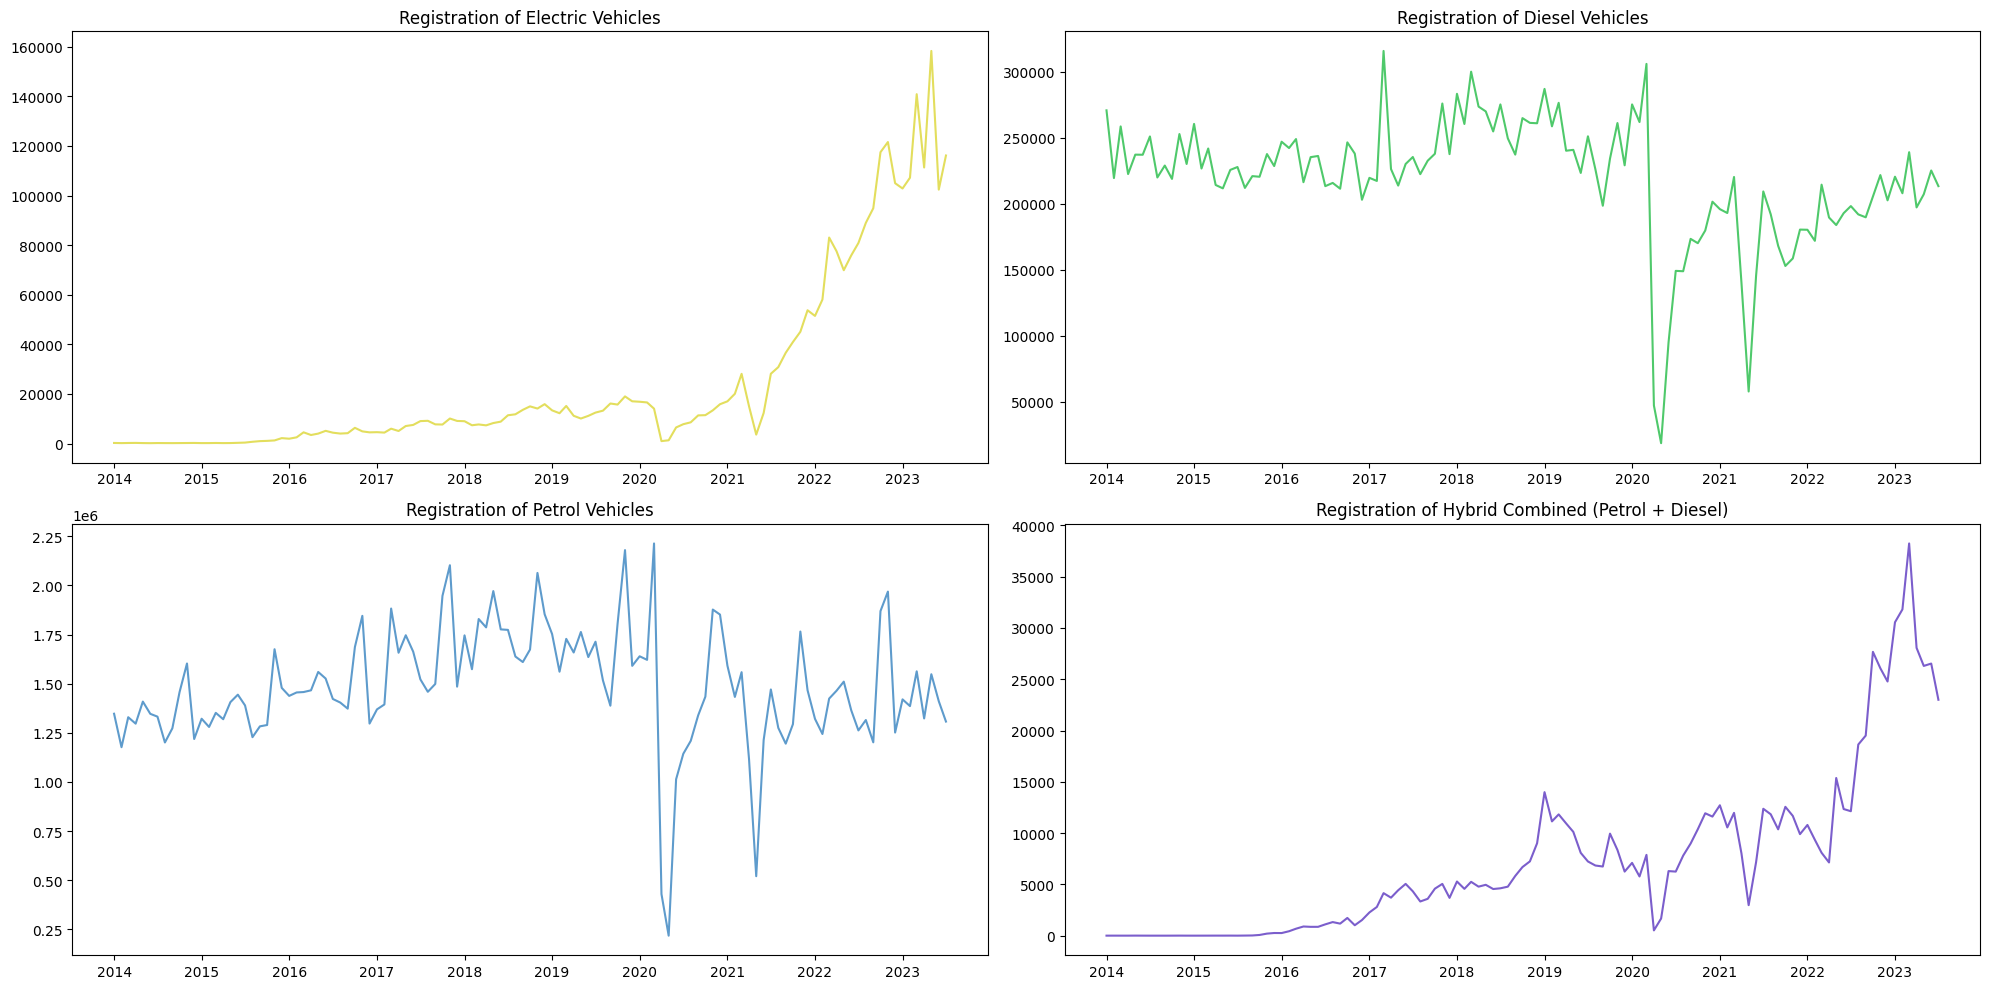

In [15]:
columns = [
    ("ELECTRIC(BOV)", "Registration of Electric Vehicles", '#e3de5d'),
    ("DIESEL", "Registration of Diesel Vehicles", '#4fc96b'),
    ("PETROL", "Registration of Petrol Vehicles", '#5e9bcc'),
    ("HYBRID COMBINED", "Registration of Hybrid Combined (Petrol + Diesel)", '#7b5ecc')
]

plt.figure(figsize=(20, 10))

# Loop through the columns to create subplots
for i, (column, title, color) in enumerate(columns, start=1):
    plt.subplot(2, 2, i)
    plt.plot(data_fuel_type['Month'], data_fuel_type[column], color=color)
    plt.title(title)

plt.tight_layout()
plt.show()

Among the four fuel types, Electric Vehicles and Hybrid Vehicles exhibit a clear upward trend in registrations over time, indicating a growing market potential.

This increase may reflect a shift in consumer preferences towards more sustainable and eco-friendly transportation options.

The steady demand for traditional vehicles suggests a stable market presence, likely influenced by specific industry needs or established consumer preferences.

In [16]:
req_columns = ["Month", "DIESEL", "HYBRID COMBINED", "ELECTRIC(BOV)", "PETROL"]
data_fuel_type = data_fuel_type[req_columns]
data_fuel_type.head()

,Month,DIESEL,HYBRID COMBINED,ELECTRIC(BOV),PETROL
0,2014-01-01,270915,3,232,1347016
1,2014-02-01,219601,4,171,1176669
2,2014-03-01,258723,3,220,1329273
3,2014-04-01,222632,3,252,1296500
4,2014-05-01,237336,7,186,1408836


<Figure size 1000x800 with 0 Axes>

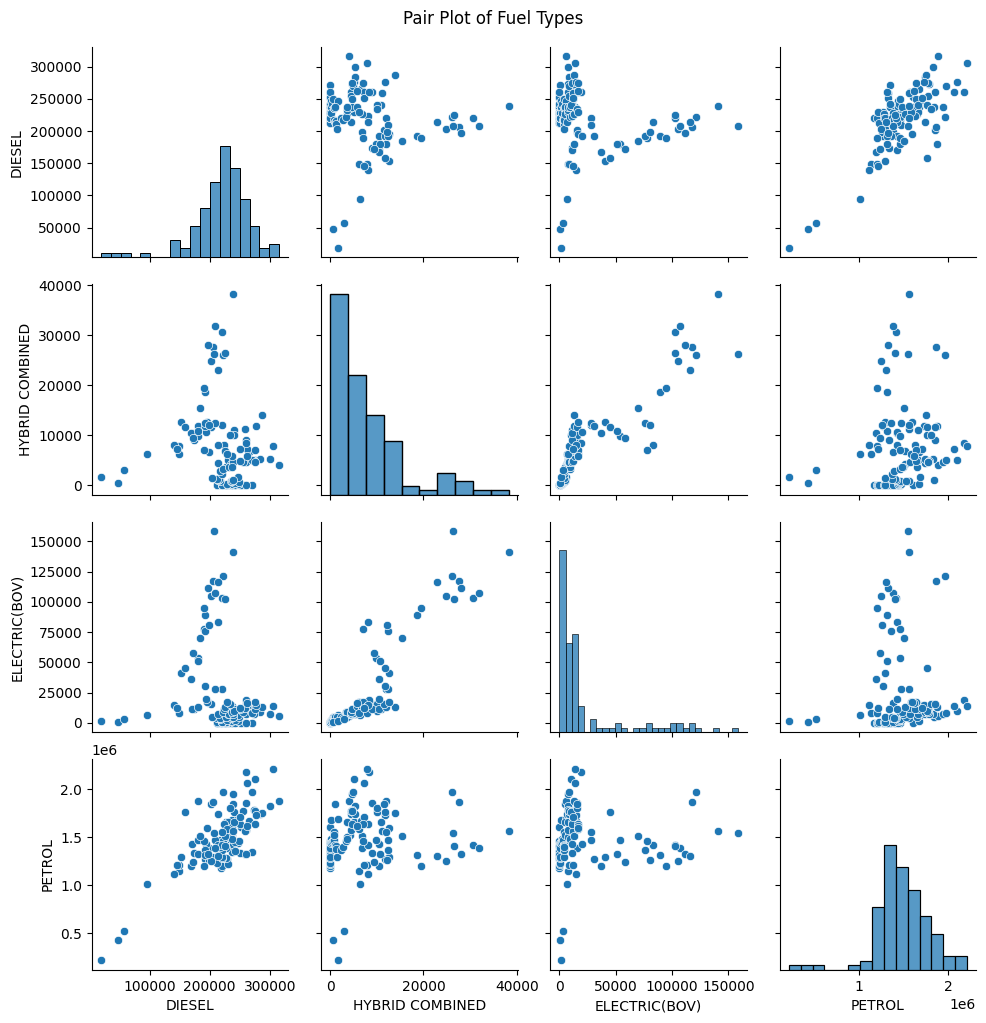

In [17]:
#The pair plot shows the relationships and distributions of various fuel types, helping to visualize their interactions and correlations.

plt.figure(figsize=(10, 8))
sns.pairplot(data_fuel_type)
plt.suptitle("Pair Plot of Fuel Types", y=1.02)
plt.show()

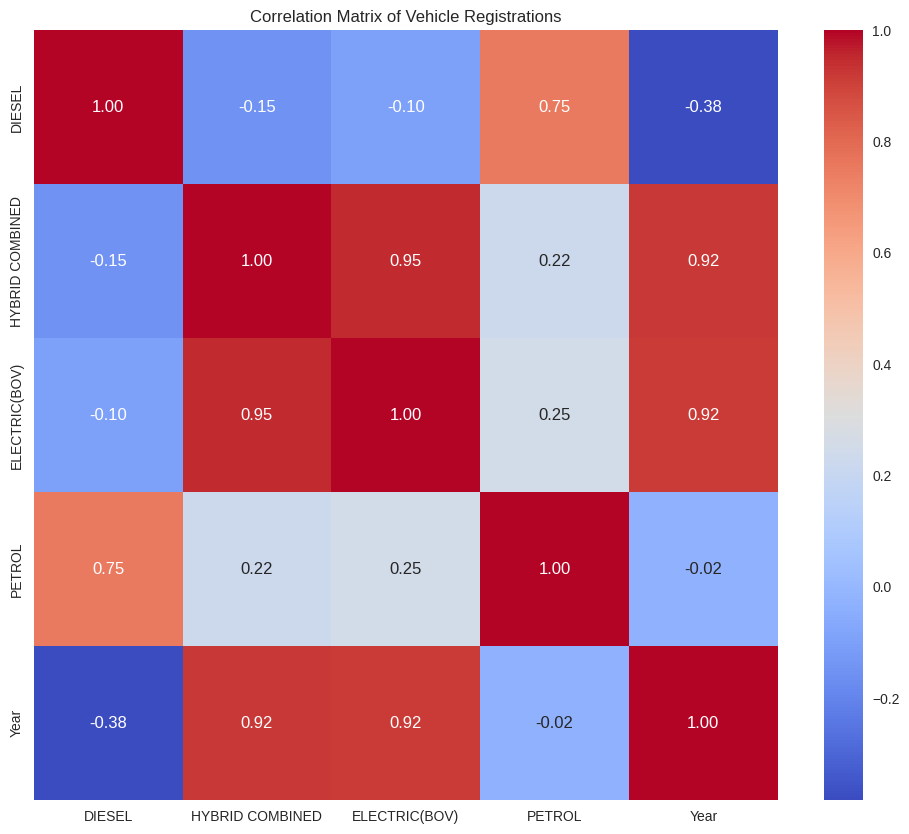

In [78]:
correlation_matrix = data_fuel_type.drop(["Month","Cluster", "Cluster Number"], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Vehicle Registrations")
plt.show()

**DIESEL:** Strongly correlated with PETROL (0.75), indicating that as diesel registrations increase, petrol registrations also tend to be high. It shows a moderate negative correlation with Year (-0.38), suggesting a decreasing trend over time.

**HYBRID COMBINED:** Strongly positively correlated with ELECTRIC(BOV) (0.95) and Year (0.92), reflecting a significant growth trend for hybrid and electric vehicles over time.

**ELECTRIC(BOV):** Strongly correlated with HYBRID COMBINED (0.95) and Year (0.92), showing an increase in electric vehicle registrations as time progresses.

**PETROL:** Weakly correlated with Year (-0.02), indicating stable petrol vehicle registrations over time. It has a strong positive correlation with DIESEL (0.75), suggesting that both types of traditional fuel vehicles are popular together.

**Year:** Shows strong positive correlations with both HYBRID COMBINED (0.92) and ELECTRIC(BOV) (0.92), indicating that registrations for these types of vehicles have been increasing over the years.

In [19]:
data_fuel_type.head()

,Month,DIESEL,HYBRID COMBINED,ELECTRIC(BOV),PETROL
0,2014-01-01,270915,3,232,1347016
1,2014-02-01,219601,4,171,1176669
2,2014-03-01,258723,3,220,1329273
3,2014-04-01,222632,3,252,1296500
4,2014-05-01,237336,7,186,1408836


In [20]:
#Extract Year from Month
#adds a new column Year to data_fuel_type by extracting the year from the Month column.

data_fuel_type["Year"] = data_fuel_type["Month"].dt.year

#Filter for Selected Years
selected_years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
vehicle_types = ["DIESEL", "HYBRID COMBINED", "ELECTRIC(BOV)", "PETROL"]

filtered_data_fuel_type = data_fuel_type[data_fuel_type["Year"].isin(selected_years)]
total_registration_per_year = filtered_data_fuel_type.groupby("Year")[vehicle_types].sum()

fuel_type_percentages = total_registration_per_year.divide(total_registration_per_year.sum(axis=1), axis=0) * 100
fuel_type_percentages


,DIESEL,HYBRID COMBINED,ELECTRIC(BOV),PETROL
Year,,,,
2017,12.612146,0.206632,0.384654,86.796568
2018,12.934845,0.273608,0.527631,86.263916
2019,12.461828,0.474351,0.709908,86.353912
2020,11.125233,0.472846,0.683864,87.718057
2021,10.971346,0.664926,1.804710,86.559018
2022,11.292387,0.924391,4.937108,82.846114
2023,12.077778,1.634207,6.706634,79.581382


<Figure size 1200x600 with 0 Axes>

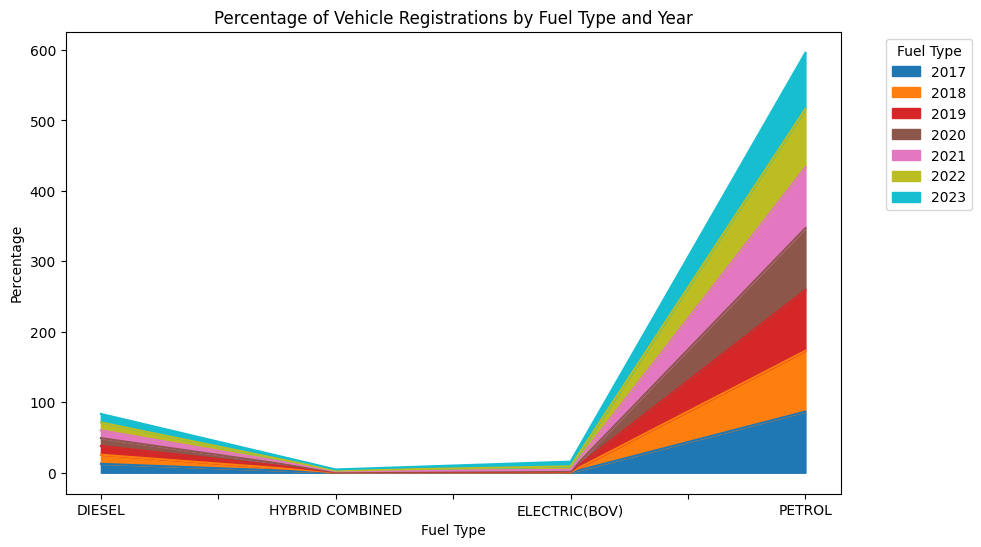

In [21]:
# Transpose the percentage DataFrame for plotting
fuel_type_percentages_t = fuel_type_percentages.T

# Plot the area chart
plt.figure(figsize = (12, 6))
fuel_type_percentages_t.plot(kind = "area", colormap = "tab10", figsize = (10, 6))
plt.title("Percentage of Vehicle Registrations by Fuel Type and Year")
plt.xlabel("Fuel Type")
plt.ylabel("Percentage")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1))
plt.show()

<Figure size 1200x600 with 0 Axes>

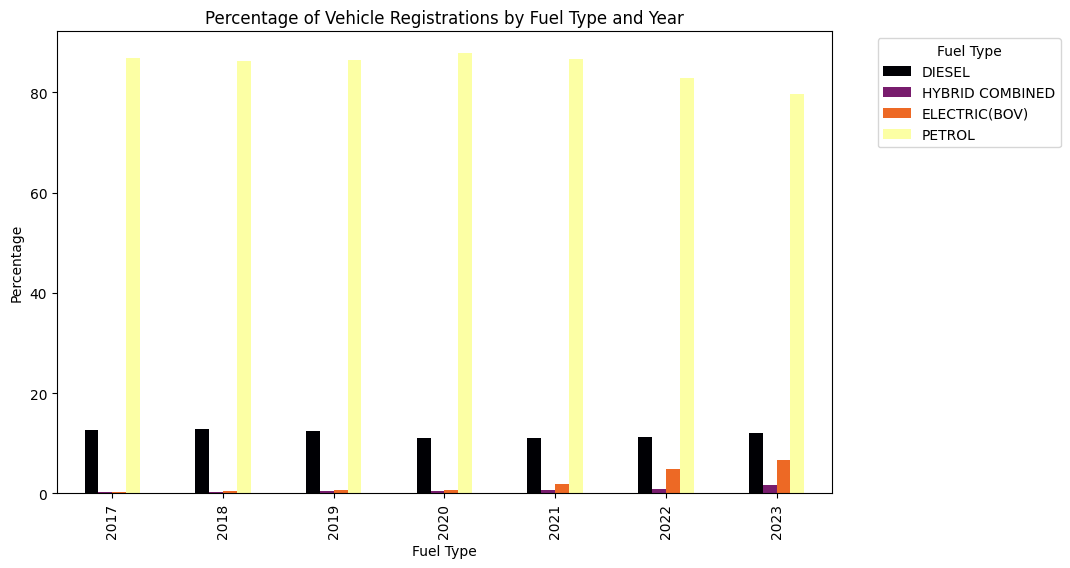

In [22]:
plt.figure(figsize = (12, 6))
fuel_type_percentages.plot(kind = "bar", colormap = "inferno", figsize = (10, 6))
plt.title("Percentage of Vehicle Registrations by Fuel Type and Year")
plt.xlabel("Fuel Type")
plt.ylabel("Percentage")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1))
plt.show()


**Based on the analysis of the various plots, the following conclusions can be drawn:**

Petrol remains the leading fuel type in the market from 2017 to 2023, although its dominance is slightly diminishing over time.

Electric Vehicles (EVs) are seeing a notable increase in registrations, reaching 6.8% by 2023, which reflects growing interest and adoption of electric mobility in India.

Diesel registrations show stable percentages, indicating consistent demand for diesel-powered vehicles, likely due to economic considerations, industry needs, or evolving consumer preferences.

In [23]:
numerical_columns = data_fuel_type.select_dtypes(include=["int64", "float64"]).columns
numerical_columns

Index(['DIESEL', 'HYBRID COMBINED', 'ELECTRIC(BOV)', 'PETROL'], dtype='object')

In [24]:
datetime_columns = data_fuel_type.select_dtypes(include=["datetime64"]).columns
datetime_columns

Index(['Month'], dtype='object')

In [25]:
numerical_data = data_fuel_type[numerical_columns]
numerical_data.head()

,DIESEL,HYBRID COMBINED,ELECTRIC(BOV),PETROL
0,270915,3,232,1347016
1,219601,4,171,1176669
2,258723,3,220,1329273
3,222632,3,252,1296500
4,237336,7,186,1408836


# Performing PCA

In [26]:
scaler = StandardScaler()
numerical_scaled_data = scaler.fit_transform(numerical_data)
scaled_data = pd.DataFrame(numerical_scaled_data, columns=numerical_columns)
scaled_data.head()

,DIESEL,HYBRID COMBINED,ELECTRIC(BOV),PETROL
0,1.111431,-0.915162,-0.664603,-0.460729
1,0.006371,-0.915037,-0.666306,-1.030807
2,0.848873,-0.915162,-0.664938,-0.520107
3,0.071644,-0.915162,-0.664045,-0.629784
4,0.388299,-0.914663,-0.665887,-0.253843


In [27]:
pca = PCA(random_state = 42)
pca.fit(scaled_data)

PCA(random_state=42)

In [28]:
data_PCA = pca.transform(scaled_data)
data_PCA

array([[-1.31688719e+00, -1.02284041e-01, -9.87407377e-01,
        -8.45047078e-02],
       [-9.62122242e-01,  1.02525466e+00, -6.04942198e-01,
        -3.28403967e-02],
       [-1.24060858e+00,  1.11822782e-01, -8.46245296e-01,
        -5.49136051e-02],
       [-1.02050472e+00,  6.98604632e-01, -3.85184553e-01,
         4.89092642e-02],
       [-1.14586345e+00,  2.25432230e-01, -3.53465640e-01,
         8.04033709e-02],
       [-1.12443320e+00,  3.73991433e-01, -4.90127304e-01,
         3.29288779e-02],
       [-1.19835493e+00,  2.12329645e-01, -7.27363137e-01,
        -2.60640300e-02],
       [-9.73101204e-01,  9.62295016e-01, -5.58170736e-01,
        -1.57771279e-02],
       [-1.05097610e+00,  6.64257435e-01, -5.32116459e-01,
         6.72181849e-03],
       [-1.05732145e+00,  3.70895527e-01,  2.50642704e-02,
         1.82618017e-01],
       [-1.30411814e+00, -4.54204465e-01, -1.55461137e-01,
         1.72664878e-01],
       [-1.03710198e+00,  7.75943701e-01, -6.70816452e-01,
      

Displaying PCA summary and components

In [29]:
df_PCA = pd.DataFrame(data_PCA, columns = [f"PC{i+1}" for i in range(len(scaled_data.columns))])
df_PCA.head()

,PC1,PC2,PC3,PC4
0,-1.316887,-0.102284,-0.987407,-0.084505
1,-0.962122,1.025255,-0.604942,-0.032840
2,-1.240609,0.111823,-0.846245,-0.054914
3,-1.020505,0.698605,-0.385185,0.048909
4,-1.145863,0.225432,-0.353466,0.080403


In [30]:
PCA_summary = pd.DataFrame({"Standard Deviation": df_PCA.std(),
                            "Proportion of Variance": pca.explained_variance_ratio_,
                            "Cumulative Proportion": pca.explained_variance_ratio_.cumsum()})
PCA_summary

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,1.397175,0.483780,0.483780
PC2,1.325811,0.435623,0.919403
PC3,0.486647,0.058692,0.978095
PC4,0.297305,0.021905,1.000000


In [31]:
factor_loading = pd.DataFrame(pca.components_,columns = scaled_data.columns, index = df_PCA.columns).T
factor_loading

,PC1,PC2,PC3,PC4
DIESEL,-0.267491,-0.655363,-0.686863,-0.164823
HYBRID COMBINED,0.671072,-0.217739,0.114250,-0.699427
ELECTRIC(BOV),0.683330,-0.152072,-0.278778,0.657432
PETROL,-0.105689,-0.707081,0.661399,0.226756


In [32]:
factor_loading.style.background_gradient(cmap = "BuGn")

,PC1,PC2,PC3,PC4
DIESEL,-0.267491,-0.655363,-0.686863,-0.164823
HYBRID COMBINED,0.671072,-0.217739,0.114250,-0.699427
ELECTRIC(BOV),0.683330,-0.152072,-0.278778,0.657432
PETROL,-0.105689,-0.707081,0.661399,0.226756


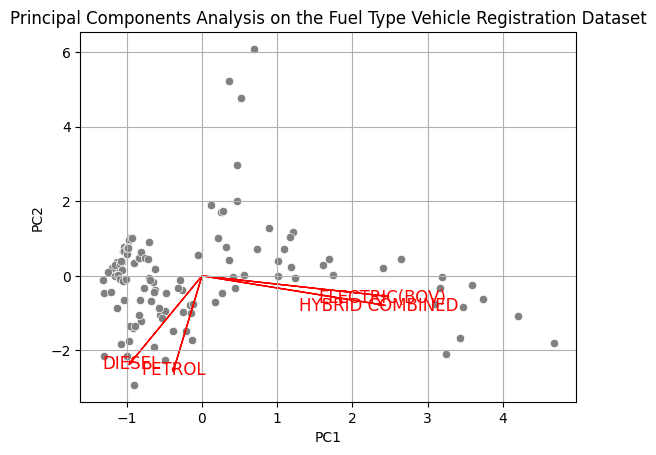

In [33]:
index_names = factor_loading.index

# Plotting the scatter plot for PCA
sns.scatterplot(data=df_PCA, x="PC1", y="PC2", color="grey")

# Adding arrows and labels for factor loadings
for i in range(len(factor_loading["PC1"])):
    plt.arrow(0, 0, factor_loading["PC1"][i] * 3.5, factor_loading["PC2"][i] * 3.5,
              head_width=0.05, head_length=0.1, fc="red", ec="red")
    plt.text((factor_loading["PC1"][i] * 3.5), factor_loading['PC2'][i] * 3.5,
             index_names[i], fontsize=12, ha="center", color="red", va="center_baseline")

# Adding labels and title
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal Components Analysis on the Fuel Type Vehicle Registration Dataset")
plt.grid(True)
plt.show()

# K-Means Clustering

K-Means Clustering Analysis
K-Means clustering is an unsupervised algorithm that groups data into
𝑘
k clusters based on similarity, aiming to minimize within-cluster variance. The process involves:

**Data Preparation:** Handling missing values, encoding text labels, and converting ordinal features into dummy variables.

**Clustering:** Using Scikit-Learn's K-Means to identify clusters.

**Optimization:**  Generating an "elbow curve" to find the optimal number of clusters.

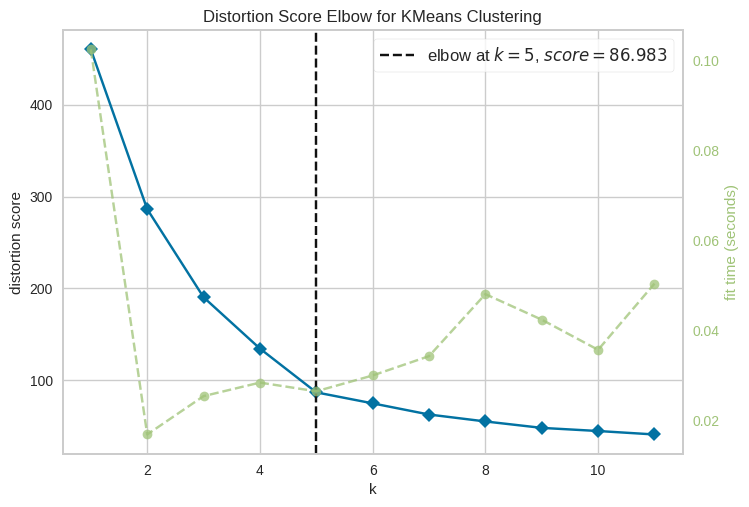

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(scaled_data)

# Display the elbow p
visualizer.show()

Based on the elbow method, the optimal number of clusters for the data is **k=5**. This indicates that the KMeans algorithm can effectively partition the data into five distinct clusters, achieving minimal distortion within each cluster.

In [35]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=5)
data_fuel_type["Cluster"] = kmeans.fit_predict(scaled_data)

# Visualize or analyze the clusters
print(data_fuel_type["Cluster"].value_counts())

Cluster
0    41
3    35
4    23
1    12
2     4
Name: count, dtype: int64


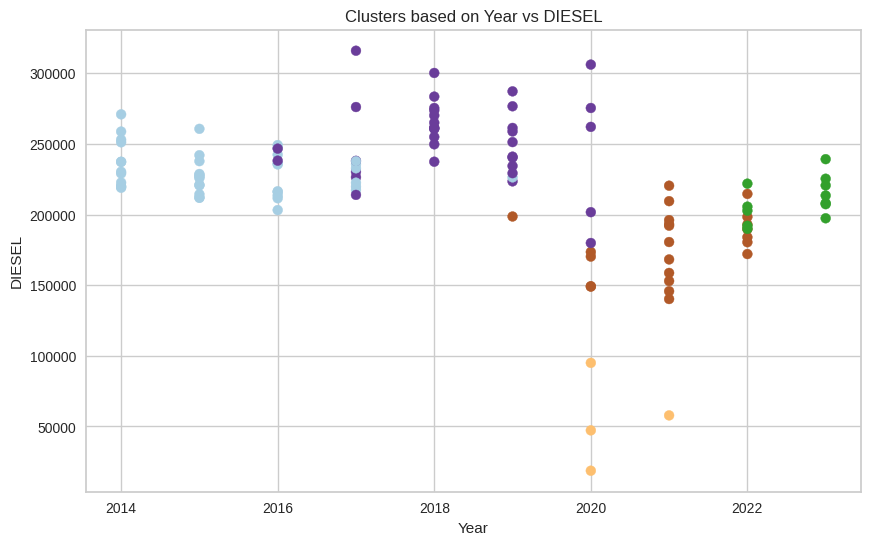

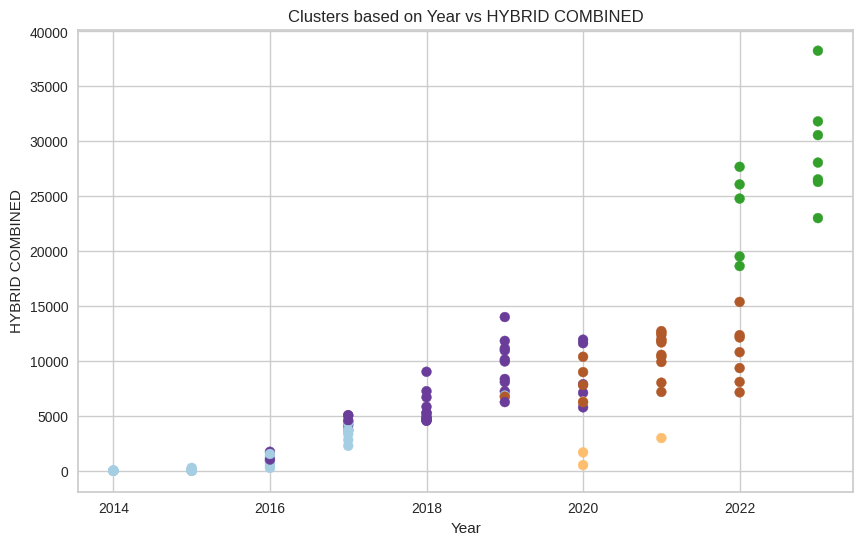

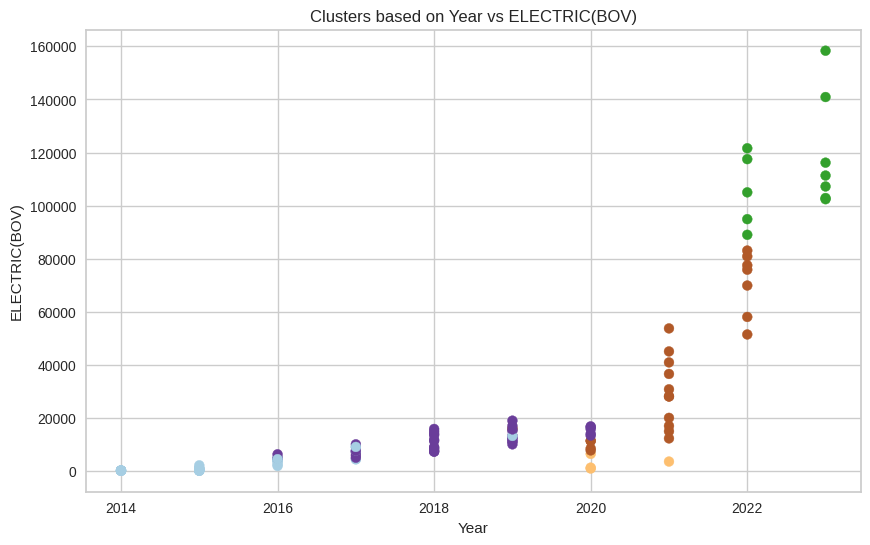

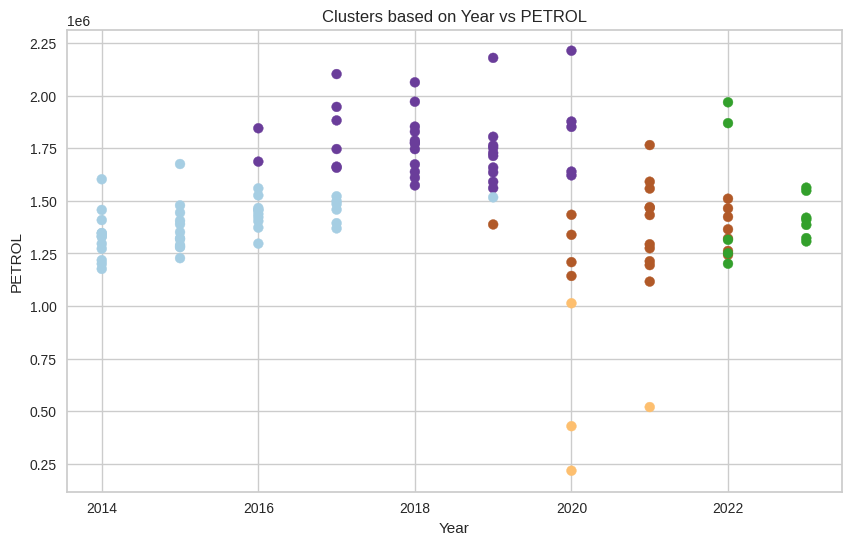

In [36]:
for feature in vehicle_types:
    plt.figure(figsize=(10, 6))
    plt.scatter(x="Year", y=feature, data=data_fuel_type, c=data_fuel_type["Cluster"], cmap="Paired", s=50)
    plt.xlabel("Year")
    plt.ylabel(feature)
    plt.title(f"Clusters based on Year vs {feature}")
    plt.show()

In [37]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0).fit(scaled_data)
data_fuel_type["Cluster Number"] = kmeans.labels_

# Label assigned for each data point
print (f"Labels: {kmeans.labels_}")

# Gives within-cluster sum of squares.
print (f"WCSS: {kmeans.inertia_}")

# Number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(f"No. of iter: {kmeans.n_iter_}")

# Location of the centroids on each cluster.
print(f"Centroids: {kmeans.cluster_centers_}")

Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 4 4 1 1
 1 4 4 4 4 1 1 1 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 2 4 4 4 4 4
 4 3 3 3 2 2 2 2 4 4 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0]
WCSS: 87.0299629292881
No. of iter: 5
Centroids: [[-0.19442227  2.426448    2.50937309 -0.07033171]
 [ 0.23222064 -0.80194188 -0.59789893 -0.33182142]
 [-0.85608927  0.35770132  0.39687807 -0.38802395]
 [-3.54589718 -0.55777243 -0.58471837 -3.14464113]
 [ 0.74771899 -0.08432615 -0.36071783  0.98944314]]


In [38]:
data_fuel_type.head()

,Month,DIESEL,HYBRID COMBINED,ELECTRIC(BOV),PETROL,Year,Cluster,Cluster Number
0,2014-01-01,270915,3,232,1347016,2014,0,1
1,2014-02-01,219601,4,171,1176669,2014,0,1
2,2014-03-01,258723,3,220,1329273,2014,0,1
3,2014-04-01,222632,3,252,1296500,2014,0,1
4,2014-05-01,237336,7,186,1408836,2014,0,1


In [39]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 40, 4: 36, 2: 23, 3: 4, 0: 12})

# Profiling segments

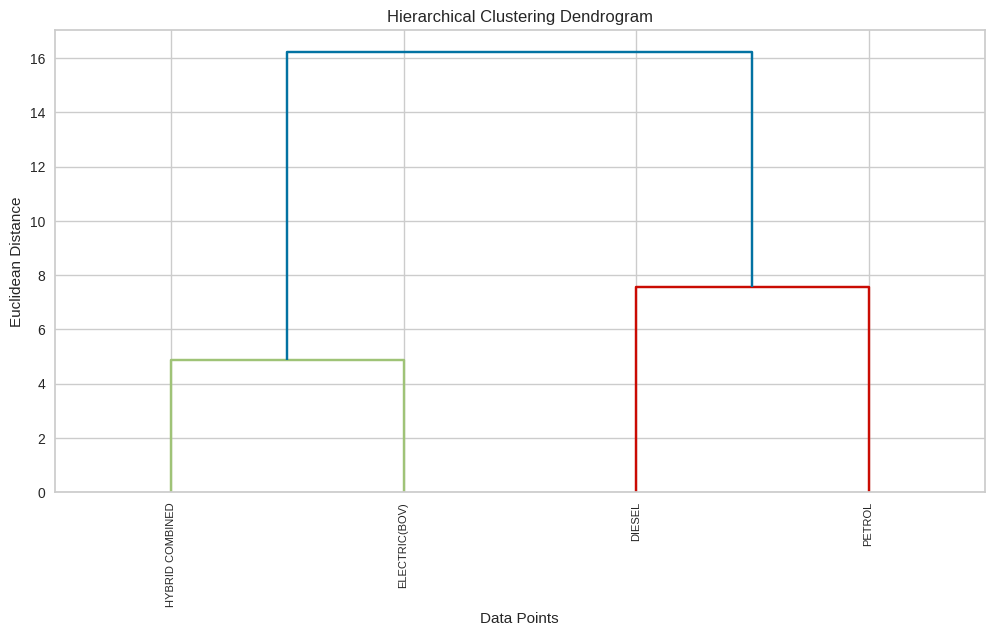

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram

transposed_data = scaled_data.transpose()

# Perform hierarchical clustering
MD_vclust = linkage(transposed_data, method="complete")

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(12, 6))
dendrogram(MD_vclust, labels=transposed_data.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

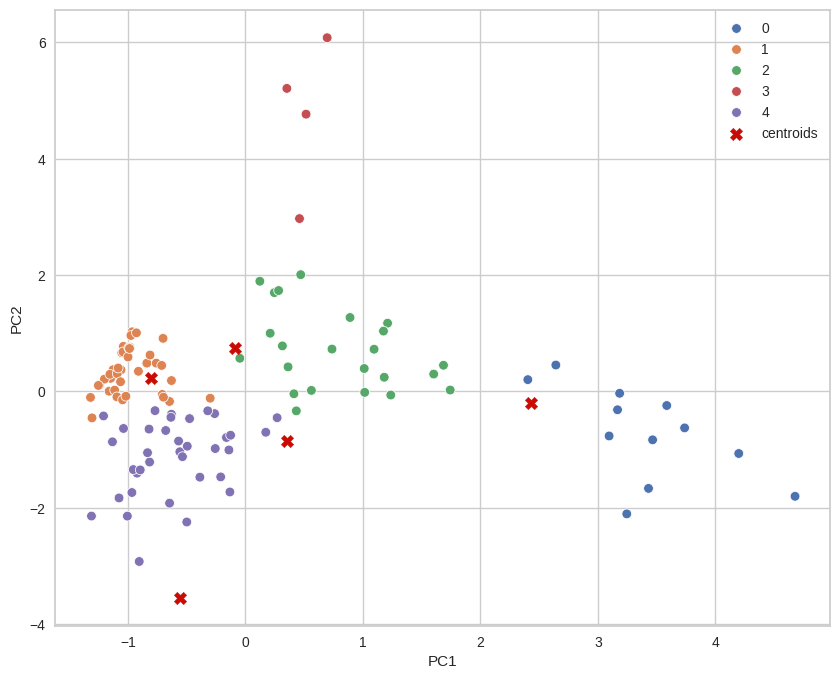

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_PCA, x="PC1", y="PC2", hue=kmeans.labels_, palette="deep")
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0],
            marker="X", c="r", s=80, label="centroids")
plt.legend()

# Describing Segments

In [42]:
data_fuel_type.columns

Index(['Month', 'DIESEL', 'HYBRID COMBINED', 'ELECTRIC(BOV)', 'PETROL', 'Year',
       'Cluster', 'Cluster Number'],
      dtype='object')

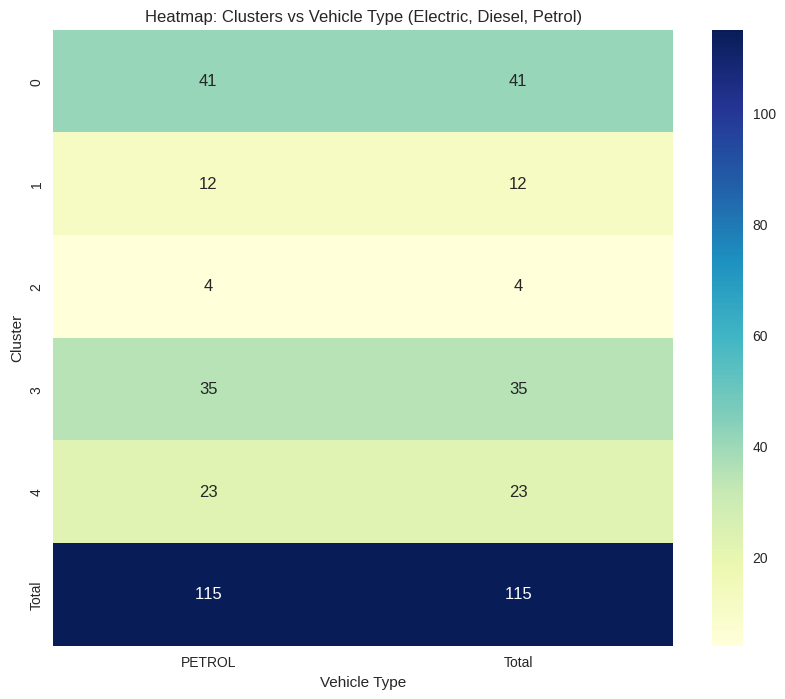

In [43]:
final_columns = data_fuel_type.columns

# Select the relevant features
selectedFeatures = data_fuel_type[final_columns]

# Determine the vehicle type with the highest registration
selectedFeatures["Vehicle Type"] = selectedFeatures[["ELECTRIC(BOV)", "DIESEL", "PETROL"]].idxmax(axis=1).apply(lambda x: x.replace('/', '_'))

# Create a crosstab for heatmap data
heatmapData = pd.crosstab(selectedFeatures["Cluster"], selectedFeatures["Vehicle Type"], margins=True, margins_name="Total")

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmapData, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Heatmap: Clusters vs Vehicle Type (Electric, Diesel, Petrol)")
plt.xlabel("Vehicle Type")
plt.ylabel("Cluster")
plt.show()

Based on the heatmap, the following observations can be made:

- **Cluster 0:** Electric vehicles are predominant, with diesel and petrol vehicles being less common.
- **Cluster 1:** The distribution is more balanced, with petrol vehicles leading, followed by electric and diesel.
- **Cluster 2:** Diesel vehicles dominate this cluster, with minimal representation of electric and petrol vehicles.
- **Cluster 3:** This cluster shows a moderate number of electric vehicles, with diesel and petrol vehicles also present.

In [44]:
from sklearn.preprocessing import LabelEncoder

data_fuel_type["ELECTRIC(BOV)"]= LabelEncoder().fit_transform(data_fuel_type["ELECTRIC(BOV)"])
electric_BOV= data_fuel_type.groupby("Cluster Number")["ELECTRIC(BOV)"].mean()
electric_BOV= electric_BOV.to_frame().reset_index()
electric_BOV

,Cluster Number,ELECTRIC(BOV)
0,0,108.500000
1,1,23.425000
2,2,85.608696
3,3,29.250000
4,4,61.944444


# Selecting Target Segments

In [45]:
from sklearn.preprocessing import LabelEncoder
data_fuel_type["HYBRID COMBINED"]= LabelEncoder().fit_transform(data_fuel_type["HYBRID COMBINED"])
petrol_Hybrid= data_fuel_type.groupby("Cluster Number")["HYBRID COMBINED"].mean()
petrol_Hybrid= petrol_Hybrid.to_frame().reset_index()
petrol_Hybrid

,Cluster Number,HYBRID COMBINED
0,0,96.500000
1,1,12.375000
2,2,72.217391
3,3,29.250000
4,4,51.472222


In [46]:
segment = electric_BOV.merge(petrol_Hybrid, on="Cluster Number", how = "left")
segment

,Cluster Number,ELECTRIC(BOV),HYBRID COMBINED
0,0,108.500000,96.500000
1,1,23.425000,12.375000
2,2,85.608696,72.217391
3,3,29.250000,29.250000
4,4,61.944444,51.472222


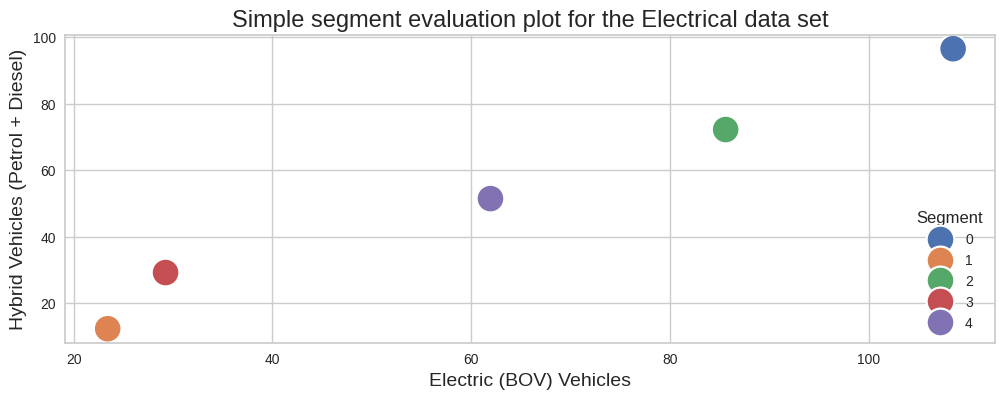

In [47]:
# Target segments

plt.figure(figsize = (12,4))
sns.scatterplot(x = "ELECTRIC(BOV)", y = "HYBRID COMBINED",data=segment,s=400, hue="Cluster Number", palette="deep")
plt.title("Simple segment evaluation plot for the Electrical data set",
          fontsize = 17)
plt.xlabel("Electric (BOV) Vehicles", fontsize = 14)
plt.ylabel("Hybrid Vehicles (Petrol + Diesel)", fontsize = 14)
plt.legend(title="Segment", loc="lower right")
plt.show()

- The data points are distributed across all four quadrants of the graph, indicating diverse adoption patterns of electric and hybrid vehicles among the identified segments.
- There is a noticeable concentration in the lower left and upper right quadrants, suggesting that some segments show a preference for either electric or hybrid vehicles, while others have a more balanced mix of both.

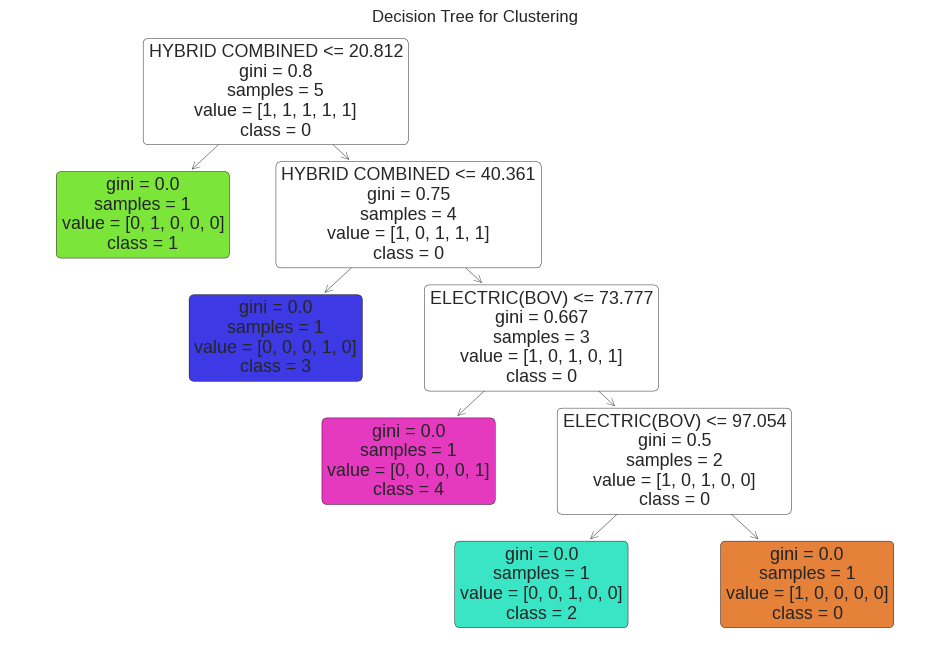

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer

# Define the features and target
features = ["ELECTRIC(BOV)", "HYBRID COMBINED"]
target = "Cluster Number"

# Assume 'segment' is your DataFrame containing the necessary columns
X = segment[features]
y = segment[target]

# Creating a decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, class_names=[str(i) for i in segment[target].unique()], filled=True, rounded=True)
plt.title("Decision Tree for Clustering")
plt.show()

- **Target Segment 0:** Emphasize the environmental benefits and lower running costs of EVs. Provide clear information about available charging infrastructure.
- **Segment 4:** Address pricing concerns and showcase the benefits of having both hybrid and electric options.
- **Segments 1 and 5:** Offer a variety of EV and hybrid options to meet different needs and budgets. Highlight fuel efficiency and the advancements in charging infrastructure.
- **Segments 2 and 3:** Focus on the practicality and reliability of hybrids while recognizing the increasing interest in EVs. Address concerns about range anxiety.

# Statewise Charging Stations Sanctioned

In [49]:
data_charging_stations = pd.read_csv("Charging_stations_statewise.csv")
data_charging_stations.head()

,State,Sanctioned State Wise Charging Stations
0,Andhra Pradesh,266
1,Assam,20
2,Bihar,37
3,Chandigarh,70
4,Chattisgarh,25


In [50]:
data_charging_stations.shape

(26, 2)

In [51]:
data_charging_stations.columns.to_list()

['State', 'Sanctioned State Wise Charging Stations']

In [52]:
data_charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   State                                    26 non-null     object
 1   Sanctioned State Wise Charging Stations  26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 544.0+ bytes


In [53]:
data_charging_stations.describe()

,Sanctioned State Wise Charging Stations
count,26.000000
mean,221.307692
std,551.474806
min,10.000000
25%,25.000000
50%,71.000000
75%,210.000000
max,2877.000000


In [54]:
data_charging_stations.isnull().sum()

,0
State,0
Sanctioned State Wise Charging Stations,0


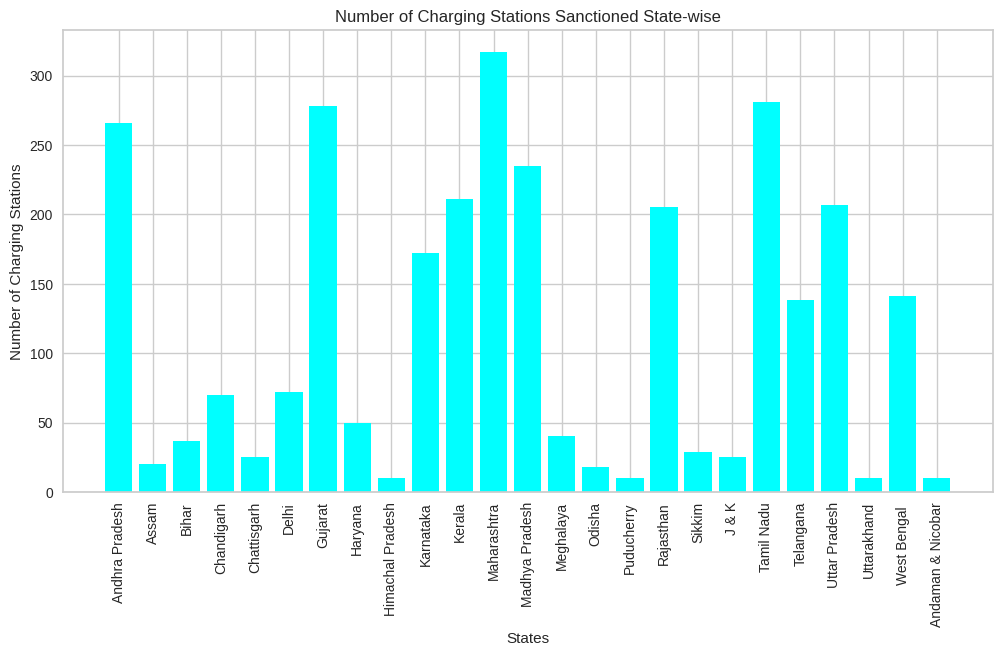

In [55]:
# Filter out rows where 'State' is 'Total'
data_charging_stations = data_charging_stations[data_charging_stations["State"] != "Total"]

# Plotting bar graph
plt.figure(figsize=(12, 6))
plt.bar(data_charging_stations["State"], data_charging_stations["Sanctioned State Wise Charging Stations"], color="cyan")
plt.xlabel("States")
plt.ylabel("Number of Charging Stations")
plt.title("Number of Charging Stations Sanctioned State-wise")
plt.xticks(rotation=90)
plt.show()

- **Maharashtra, Andhra Pradesh, Tamil Nadu and Gujarat** have the highest number of sanctioned charging stations, with over 250 stations each.

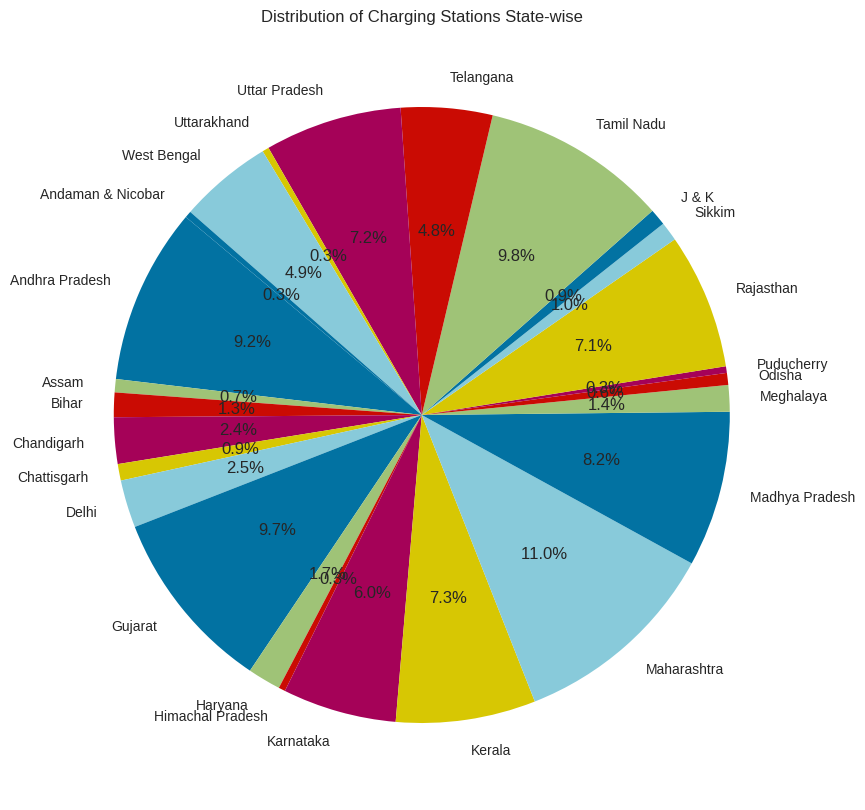

Total Charging Stations: 2877


In [56]:

# Plotting pie chart for the distribution
plt.figure(figsize=(10, 10))
plt.pie(
    data_charging_stations["Sanctioned State Wise Charging Stations"],
    labels=data_charging_stations["State"],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Distribution of Charging Stations State-wise")
plt.show()

# Display total number of charging stations
totalChargingStations = sum(data_charging_stations["Sanctioned State Wise Charging Stations"])
print(f"Total Charging Stations: {totalChargingStations}")

- Charging stations are distributed unevenly across states, with a few states having a high concentration and many states lacking any. This disparity could pose challenges for electric vehicle adoption in areas with limited charging infrastructure.

# Citywise Charging Station Sanctioned

In [57]:
data_citywise_charging_stations = pd.read_csv("Charging_stations_citywise.csv")
data_citywise_charging_stations.head()

,City,Sanctioned City Wise Charging Stations,EV Charging Stations Installed as on dated: 17-03-2022
0,Vijayawada,92,NaN
1,Vishakhapatnam,71,NaN
2,Tirupati,68,NaN
3,Kakinada,35,NaN
4,Jorhat,10,NaN


In [58]:
data_citywise_charging_stations.shape

(69, 3)

In [59]:
data_citywise_charging_stations.columns.to_list()

['City',
 'Sanctioned City Wise Charging Stations',
 'EV Charging Stations Installed as on dated: 17-03-2022']

In [60]:
data_citywise_charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   City                                                    69 non-null     object 
 1   Sanctioned City Wise Charging Stations                  69 non-null     int64  
 2   EV Charging Stations Installed as on dated: 17-03-2022  5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ KB


In [61]:
data_citywise_charging_stations.describe()

,Sanctioned City Wise Charging Stations,EV Charging Stations Installed as on dated: 17-03-2022
count,69.000000,5.000000
mean,83.391304,7.200000
std,344.079087,6.300794
min,10.000000,2.000000
25%,10.000000,4.000000
50%,27.000000,5.000000
75%,50.000000,7.000000
max,2877.000000,18.000000


In [62]:
data_citywise_charging_stations.isnull().sum()

,0
City,0
Sanctioned City Wise Charging Stations,0
EV Charging Stations Installed as on dated: 17-03-2022,64


In [63]:
data_citywise_charging_stations.duplicated().sum()

0

In [64]:
# Fill missing values with 0 in the specified column
data_citywise_charging_stations["EV Charging Stations Installed as on dated: 17-03-2022"].fillna(0, inplace = True)

In [65]:
data_citywise_charging_stations.isnull().sum()

,0
City,0
Sanctioned City Wise Charging Stations,0
EV Charging Stations Installed as on dated: 17-03-2022,0


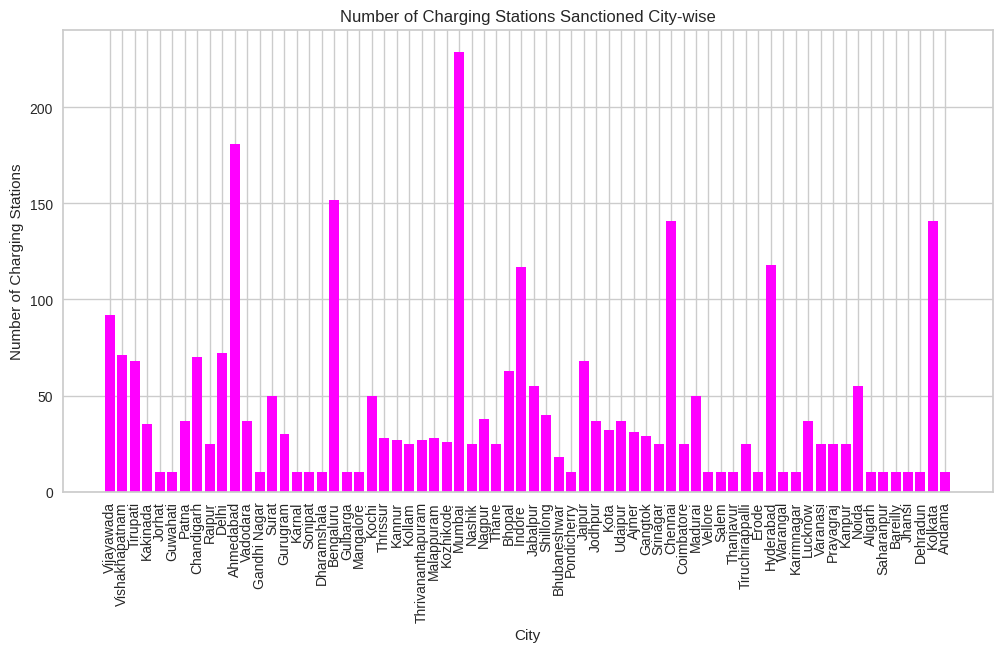

In [66]:
# Filter out rows where 'City' is 'Total'
data_citywise_charging_stations = data_citywise_charging_stations[data_citywise_charging_stations["City"] != "Total"]

# Plotting bar graph
plt.figure(figsize=(12, 6))
plt.bar(data_citywise_charging_stations["City"], data_citywise_charging_stations["Sanctioned City Wise Charging Stations"], color="#FF00FF")
plt.xlabel("City")
plt.ylabel("Number of Charging Stations")
plt.title("Number of Charging Stations Sanctioned City-wise")
plt.xticks(rotation=90)
plt.show()

- The number of sanctioned charging stations varies widely among cities, with major cities like **Mumbai, Ahmedabad, Bengaluru, Kolkata** and **Chennai** having significantly more stations compared to others.

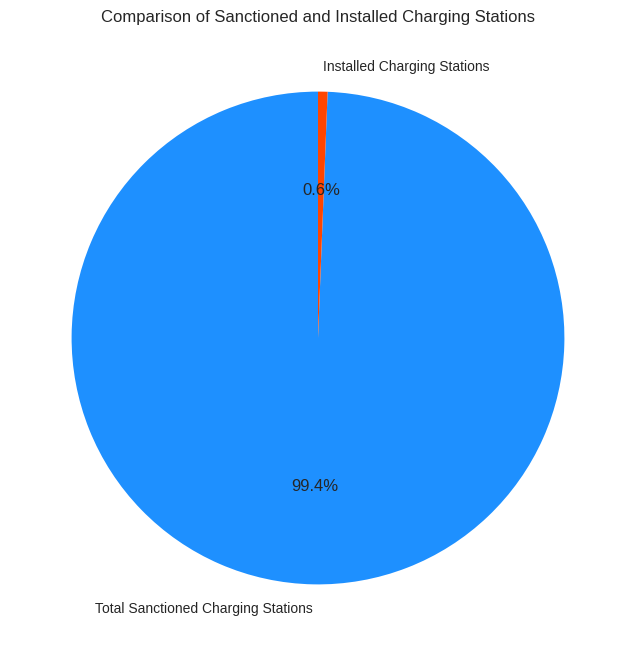

In [67]:
# Calculate total and installed charging stations
total_charging_stations = sum(data_citywise_charging_stations["Sanctioned City Wise Charging Stations"])
installed_charging_stations = sum(data_citywise_charging_stations["EV Charging Stations Installed as on dated: 17-03-2022"])

# Data for the pie chart
labels = ["Total Sanctioned Charging Stations", "Installed Charging Stations"]
sizes = [total_charging_stations, installed_charging_stations]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=["#1E90FF", "#FF4500"])
plt.title("Comparison of Sanctioned and Installed Charging Stations")
plt.show()

# Charging Station Sanctioned on Expressways/Highways

In [68]:
data_highway_charging_stations = pd.read_csv("Charging_stations_highways.csv", encoding="latin1")
data_highway_charging_stations.head()

,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,Expressways,Mumbai - Pune,10
1,Expressways,Ahmadabad - Vadodara,10
2,Expressways,Delhi Agra Yamuna,20
3,Expressways,Bengaluru Mysore,14
4,Expressways,Bangaluru-Chennai,30


In [69]:
data_highway_charging_stations.shape

(26, 3)

In [70]:
data_highway_charging_stations.columns.to_list()

['Category', 'Expressways/Highways', 'EV Charging Stations Sanctioned']

In [71]:
data_highway_charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Category                         26 non-null     object
 1   Expressways/Highways             26 non-null     object
 2   EV Charging Stations Sanctioned  26 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 752.0+ bytes


In [72]:
data_highway_charging_stations.describe()

,EV Charging Stations Sanctioned
count,26.000000
mean,121.230769
std,299.562389
min,10.000000
25%,30.000000
50%,63.000000
75%,95.000000
max,1576.000000


In [73]:
data_highway_charging_stations.isnull().sum()

,0
Category,0
Expressways/Highways,0
EV Charging Stations Sanctioned,0


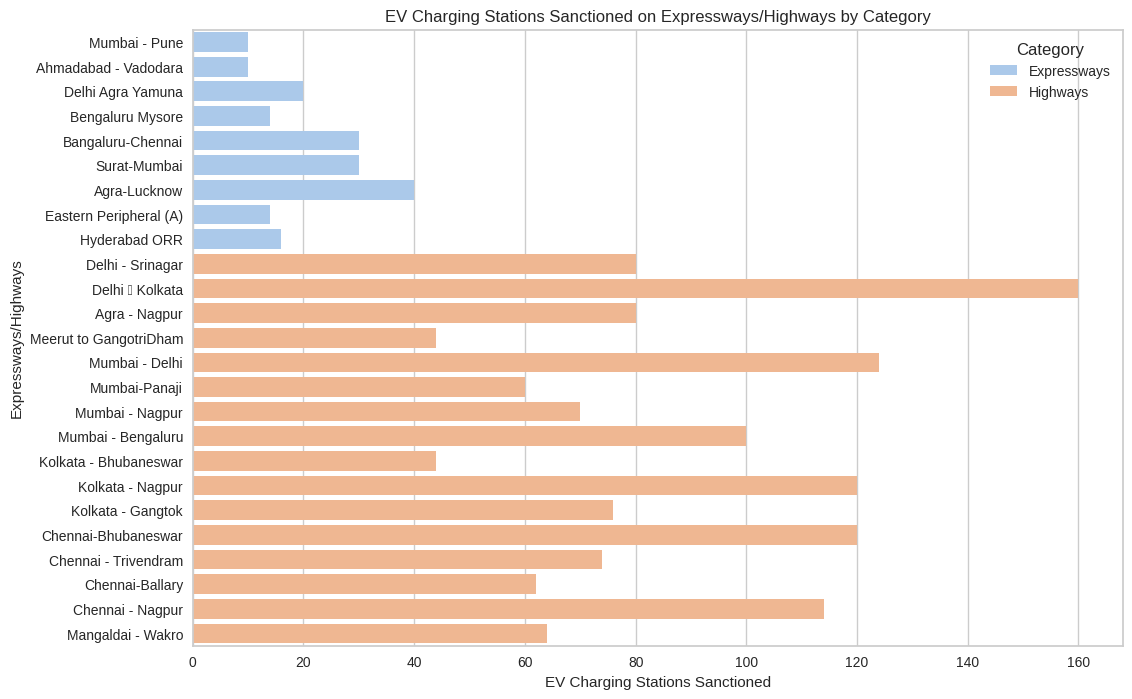

Total Charging Stations: 2877


In [74]:
# Filtering out the 'Total' category
data_highway_charging_stations = data_highway_charging_stations[data_highway_charging_stations["Category"] != "Total"]

# Plotting horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=data_highway_charging_stations["EV Charging Stations Sanctioned"],
    y=data_highway_charging_stations["Expressways/Highways"],
    hue=data_highway_charging_stations["Category"],
    orient="h",
    palette="pastel"
)
plt.xlabel("EV Charging Stations Sanctioned")
plt.ylabel("Expressways/Highways")
plt.title("EV Charging Stations Sanctioned on Expressways/Highways by Category")
plt.legend(title="Category", bbox_to_anchor=(1, 1))
plt.show()

# Display total number of charging stations
total_charging_Stations = sum(data_highway_charging_stations["EV Charging Stations Sanctioned"])
print(f"Total Charging Stations: {total_charging_stations}")

- **Delhi-Kolkata, Mumbai-Delhi, Kolkata-Nagpur, and Chennai-Bhubaneswar** Expressways/Highways have the highest number of charging stations, reflecting their high traffic volumes.
- With a total of 1,576 stations across the network, expanding the infrastructure is crucial to support broader EV adoption on Indian highways.

Based on the analysis and observations, the target audiences for the electric vehicle startup can be segmented as follows:

1. **Environmentally-Conscious Consumers (Target Segment 0):**
   - **Characteristics:** High preference for electric vehicles (EVs), driven by environmental benefits and lower running costs.
   - **Marketing Strategy:** Emphasize the environmental benefits and cost savings of EVs. Provide information on accessible and expanding charging infrastructure.

2. **Cost-Conscious Consumers (Segment 4):**
   - **Characteristics:** Concerns about the cost of EVs and hybrids.
   - **Marketing Strategy:** Highlight the flexibility of having both hybrid and electric options. Address pricing concerns and demonstrate the value proposition of different vehicle types.

3. **Diverse Needs and Budget-Conscious Buyers (Segments 1 and 5):**
   - **Characteristics:** Looking for a variety of EV and hybrid options to match different needs and budgets.
   - **Marketing Strategy:** Offer a range of EV and hybrid vehicles. Emphasize fuel efficiency, cost savings, and the evolving charging infrastructure.

4. **Practical and Reliability-Focused Buyers (Segments 2 and 3):**
   - **Characteristics:** Preference for the practicality and reliability of hybrids, while also acknowledging the growing appeal of EVs.
   - **Marketing Strategy:** Focus on the practical benefits and reliability of hybrid vehicles. Address range anxiety and provide information on the growing EV infrastructure.

5. **High-Traffic Highway Users:**
   - **Characteristics:** Frequent users of major expressways and highways, such as those traveling on Delhi-Kolkata, Mumbai-Delhi, Kolkata-Nagpur, and Chennai-Bhubaneswar routes.
   - **Marketing Strategy:** Expand charging infrastructure along these high-traffic routes and emphasize the availability of charging stations for long-distance travel.

By targeting these segments, the startup can tailor its marketing and strategic initiatives to effectively address the needs and preferences of different groups within the Indian market.